In [1]:
from sklearn.datasets import load_iris
import numpy as np
X = load_iris(as_frame=True)["data"]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


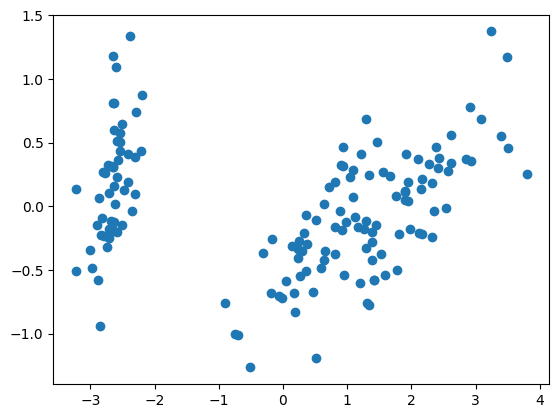

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
red_X = pca.fit_transform(X)
plt.scatter(red_X[:,0], red_X[:,1])

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =2, random_state=42)
pred = km.fit_predict(X)


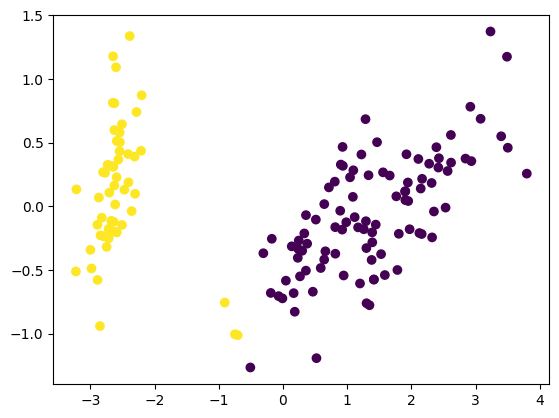

In [4]:
plt.scatter(red_X[:,0], red_X[:,1], c = pred)

In [5]:
idx = red_X[:,0] < -1
red_X[idx].mean(axis = 0)

array([-2.64241546,  0.19088505])

In [6]:
idx = (red_X[:,0] >= -1) & (red_X[:,1] >= 0)
red_X[idx].mean(axis = 0)

array([2.02803947, 0.35745941])

In [7]:
idx = (red_X[:,0] >= -1) & (red_X[:,1] < 0)
red_X[idx].mean(axis = 0)

array([ 0.80936406, -0.42340599])

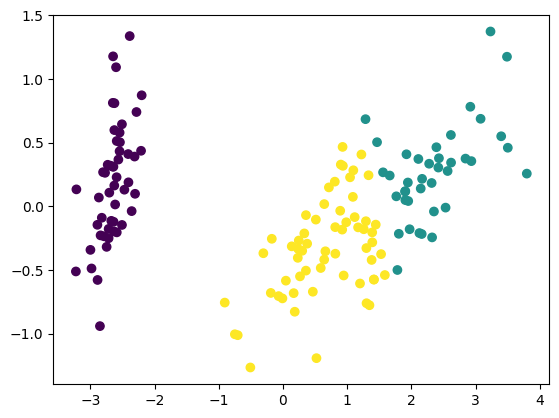

In [8]:
init_auto = np.array([
    [-2.64241546,  0.19088505],
    [2.02803947, 0.35745941],
    [ 0.80936406, -0.42340599]
])


init_auto_pca = (init_auto@ pca.components_) + pca.mean_ # Puntos antes del PCA...

km = KMeans(n_clusters=3, init = init_auto_pca, n_init=1, random_state=42)
preds_auto = km.fit_predict(X)
plt.scatter(red_X[:,0], red_X[:,1], c = preds_auto)

In [9]:
pca.components_
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
init = np.array([
[-3,0],
[1,-0.5],
[3,0.5]
])

In [11]:
init.shape

(3, 2)

In [12]:
init_pre_pca = (init@ pca.components_) + pca.mean_ # Puntos antes del PCA...

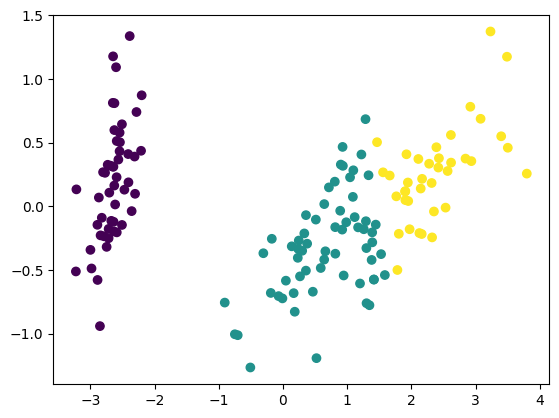

In [13]:
km = KMeans(n_clusters=3, random_state=42, init = init_pre_pca, n_init=1)
pred_init = km.fit_predict(X)
plt.scatter(red_X[:,0], red_X[:,1], c = pred_init);